In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [3]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print(list(ENGLISH_STOP_WORDS))

['via', 'where', 'to', 'you', 'out', 'couldnt', 'being', 'once', 'beyond', 'hereupon', 'neither', 'could', 'into', 'bill', 'he', 'other', 'throughout', 'herein', 'further', 'would', 'everyone', 'am', 'never', 'hundred', 'whom', 'amongst', 'seeming', 'not', 'rather', 'another', 'twelve', 'have', 'has', 'within', 'still', 'whereafter', 'mostly', 'anyhow', 'becoming', 'together', 'but', 'de', 'no', 'be', 'should', 'any', 'might', 'by', 'fifty', 'myself', 'enough', 'at', 'former', 'side', 'done', 'they', 'thick', 'latterly', 'therefore', 'ie', 'least', 'yourself', 'therein', 'hers', 'without', 'somehow', 'itself', 'its', 'front', 'whereas', 'each', 'etc', 'per', 'more', 'mine', 'which', 'ourselves', 'show', 'inc', 'latter', 'four', 'over', 'against', 'nine', 'above', 'thereupon', 'sixty', 'nothing', 'bottom', 'through', 'then', 'his', 'full', 'none', 'many', 'ten', 'top', 'us', 'last', 'are', 'toward', 'under', 'towards', 'such', 'mill', 'nor', 'often', 'yet', 'onto', 'somewhere', 'well', 

In [4]:
df.shape

(50000, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment distribution')

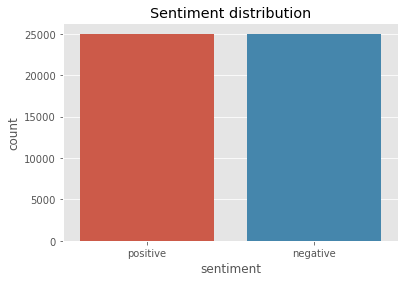

In [6]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment distribution")

In [7]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [8]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [9]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review sentiment  word count
0  One of the other reviewers has mentioned that ...  positive         307
1  A wonderful little production. <br /><br />The...  positive         162
2  I thought this was a wonderful way to spend ti...  positive         166
3  Basically there's a family where a little boy ...  negative         138
4  Petter Mattei's "Love in the Time of Money" is...  positive         230

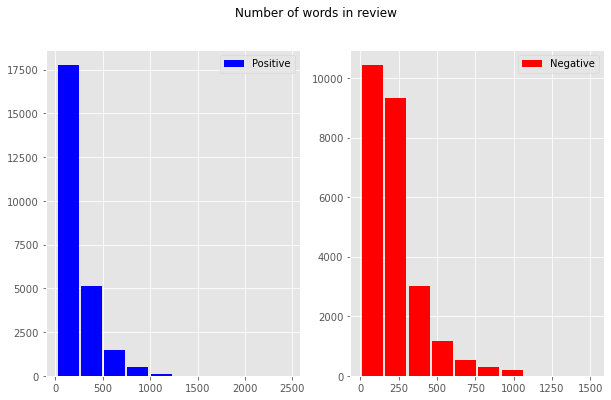

In [10]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word count'], label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word count'], label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

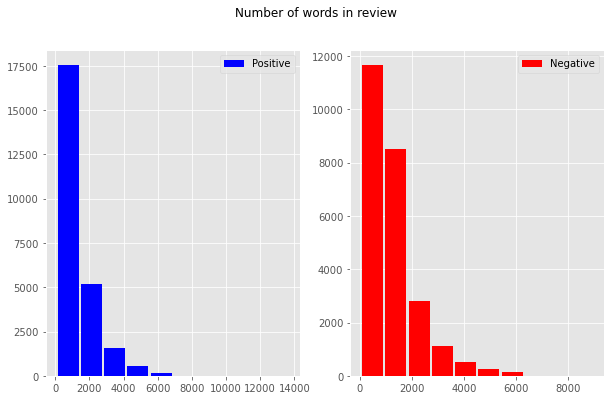

In [11]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label='Positive', color='blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label='Negative', color='red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [12]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)
df.head()

review  sentiment  word count
0  One of the other reviewers has mentioned that ...          1         307
1  A wonderful little production. <br /><br />The...          1         162
2  I thought this was a wonderful way to spend ti...          1         166
3  Basically there's a family where a little boy ...          0         138
4  Petter Mattei's "Love in the Time of Money" is...          1         230

In [13]:
before_process = df.iloc[6][0]
print(before_process)

I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a comeback of a new sea hunt.We need a change of pace in TV and this would work for a world of under water adventure.Oh by the way thank you for an outlet like this to view many viewpoints about TV and the many movies.So any ole way I believe I've got what I wanna say.Would be nice to read some more plus points about sea hunt.If my rhymes would be 10 lines would you let me submit,or leave me out to be in doubt and have me to quit,If this is so then I must go so lets do it.


In [14]:
def process(x):
    x = re.sub('[,\.!?:()"]', '', x)
    x = re.sub('<.*?>', ' ', x)
    x = re.sub('http\S+', ' ', x)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = re.sub('\s+', ' ', x)
    return x.lower().strip()

In [65]:
df['review'] = df['review'].apply(lambda x: process(x))

In [66]:
after_process = df.iloc[6][0]
print(after_process)

sure like resurrection dated seahunt series tech today bring kid excitement mei grew black white tv seahunt gunsmoke hero s weekyou vote comeback new sea huntwe need change pace tv work world water adventureoh way thank outlet like view viewpoints tv moviesso ole way believe ve got wanna saywould nice read plus points sea huntif rhymes 10 lines let submitor leave doubt quitif lets


In [67]:
def sw_remove(x):
    
    #words = nltk.tokenize.word_tokenize(x)
    words = [word for word in x.split() if word not in ENGLISH_STOP_WORDS]
    return ' '.join(words)

In [68]:
df['review'] = df['review'].apply(lambda x: sw_remove(x))

In [69]:
after_removal = sw_remove(after_process)
print(after_removal)

sure like resurrection dated seahunt series tech today bring kid excitement mei grew black white tv seahunt gunsmoke hero s weekyou vote comeback new sea huntwe need change pace tv work world water adventureoh way thank outlet like view viewpoints tv moviesso ole way believe ve got wanna saywould nice read plus points sea huntif rhymes 10 lines let submitor leave doubt quitif lets


In [70]:
df.head()

review  sentiment  word count
0  reviewers mentioned watching just 1 oz episode...          1         153
1  wonderful little production filming technique ...          1          79
2  thought wonderful way spend time hot summer we...          1          77
3  basically s family little boy jake thinks s zo...          0          65
4  petter mattei s love time money visually stunn...          1         112

In [71]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [72]:
df = df.drop_duplicates('review')

In [73]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [74]:
df.review = df['review'].apply(lambda x: stemming(x))

In [75]:
df['word count'] = df['review'].apply(no_of_words)
df.head()

review  sentiment  word count
0  reviewers mentioned watching just 1 oz episode...          1         153
1  wonderful little production filming technique ...          1          79
2  thought wonderful way spend time hot summer we...          1          77
3  basically s family little boy jake thinks s zo...          0          65
4  petter mattei s love time money visually stunn...          1         112

In [76]:
pos_reviews = df[df.sentiment ==1]
pos_reviews.head()

review  sentiment  word count
0  reviewers mentioned watching just 1 oz episode...          1         153
1  wonderful little production filming technique ...          1          79
2  thought wonderful way spend time hot summer we...          1          77
4  petter mattei s love time money visually stunn...          1         112
5  probably time favorite movie story selflessnes...          1          59

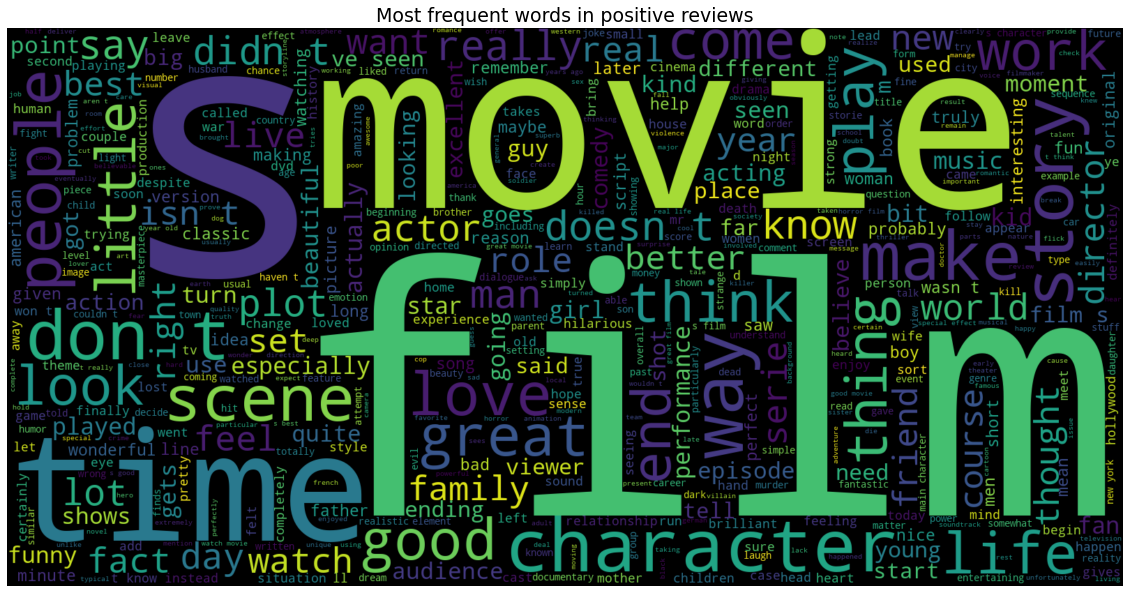

In [77]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [78]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('s', 63969),
 ('film', 41743),
 ('movie', 37313),
 ('t', 26946),
 ('like', 17568),
 ('good', 14838),
 ('just', 13971),
 ('story', 12838),
 ('great', 12794),
 ('time', 12598),
 ('really', 10690),
 ('people', 8638),
 ('love', 8604),
 ('best', 8445),
 ('life', 8024)]

In [79]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0      s  63969
1   film  41743
2  movie  37313
3      t  26946
4   like  17568

In [80]:
neg_reviews = df[df.sentiment == 0]
neg_reviews.head()

review  sentiment  word count
3   basically s family little boy jake thinks s zo...          0          65
7   amazing fresh innovative idea 70 s aired 7 8 y...          0          73
8   encouraged positive comments film looking forw...          0          58
10  phil alien quirky films humour based oddness a...          0          42
11  saw movie 12 came recall scariest scene big bi...          0          81

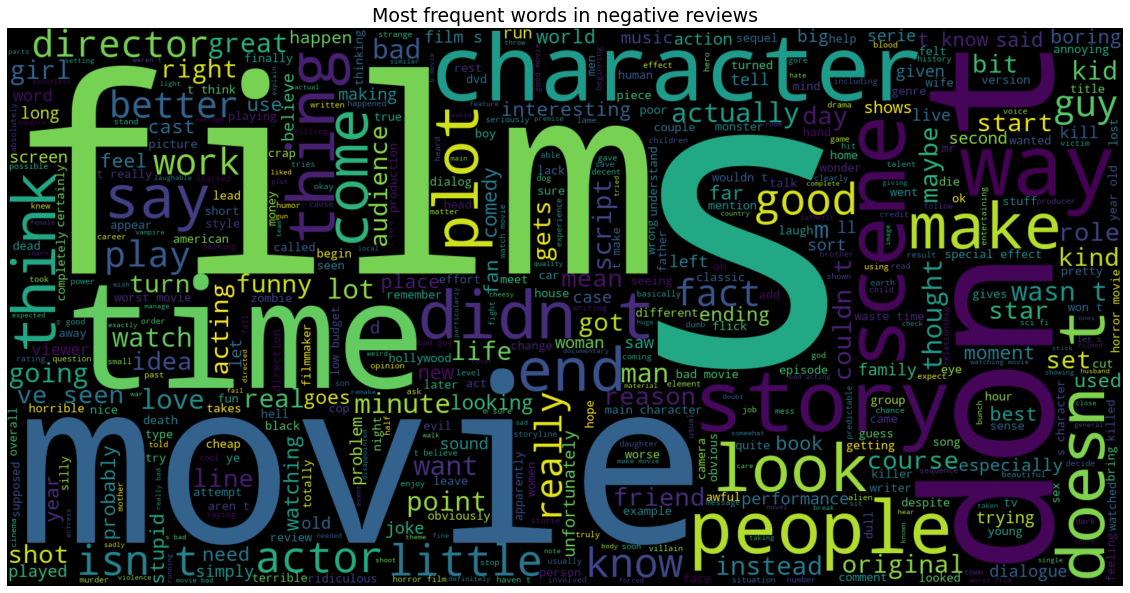

In [81]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative reviews', fontsize = 19)
plt.show()

In [82]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(15)

[('s', 59632),
 ('movie', 49226),
 ('t', 40180),
 ('film', 37002),
 ('like', 22106),
 ('just', 20753),
 ('good', 14491),
 ('bad', 14442),
 ('really', 12171),
 ('time', 12107),
 ('don', 10413),
 ('story', 10012),
 ('people', 9293),
 ('make', 9249),
 ('movies', 8161)]

In [83]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0      s  59632
1  movie  49226
2      t  40180
3   film  37002
4   like  22106

In [84]:
X = df['review']
Y = df['sentiment']
print(X)
print(X[6])

0        reviewers mentioned watching just 1 oz episode...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically s family little boy jake thinks s zo...
4        petter mattei s love time money visually stunn...
                               ...                        
49995    thought movie did right good job wasn t creati...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    m going disagree previous comment maltin secon...
49999    expects star trek movies high art fans expect ...
Name: review, Length: 49575, dtype: object
sure like resurrection dated seahunt series tech today bring kid excitement mei grew black white tv seahunt gunsmoke hero s weekyou vote comeback new sea huntwe need change pace tv work world water adventureoh way thank outlet like view viewpoints tv moviesso ole way believe ve got wanna saywould nice read 

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [86]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))
print(x_test.iloc[0])

Size of x_train:  (34702,)
Size of y_train:  (34702,)
Size of x_test:  (14873,)
Size of y_test:  (14873,)
oh boy films like really bother movie supposed close truth assume rommel knew hitler time wwii started movie rommel mentions hitler changed t imagine rommel wouldn t known hitler s government policies rommel share guilt german atrocities mind problem movie makes rommel s life end tragic choices feel bad t t buy theory competent generals allowed fight war allies trouble winning competent people charge wwii started place movie watching aspect film jumps place place time like history special big actors playing historical roles leo g carroll couple good scenes james mason liked fact spoke english ridiculous accents essential


In [87]:
vect = TfidfVectorizer()
X = vect.fit_transform(x_train)
X_test = vect.transform(x_test)
#print(X)
print(X_test)
#X = vect.fit_transform(df['review'])
print(X)

  (0, 103722)	0.16499852373207968
  (0, 103426)	0.0578461143536825
  (0, 102635)	0.07402496258743663
  (0, 101066)	0.03930218905177886
  (0, 100797)	0.054305735931839946
  (0, 95935)	0.06431295555625881
  (0, 95796)	0.0671480195485906
  (0, 94993)	0.07333842059238824
  (0, 93771)	0.0562575776980657
  (0, 92936)	0.08340498619853448
  (0, 90273)	0.054141874440615086
  (0, 88035)	0.11951489770980987
  (0, 87299)	0.09124122835831032
  (0, 86897)	0.04922444880777398
  (0, 83134)	0.07206142925287022
  (0, 81027)	0.038689454259859146
  (0, 78891)	0.7307461357808742
  (0, 78761)	0.058144832592326945
  (0, 78059)	0.0595248946846775
  (0, 75593)	0.029847126343701166
  (0, 72936)	0.054695947912977
  (0, 71433)	0.11131508162937001
  (0, 70927)	0.05290471604022134
  (0, 70695)	0.14337259703779298
  (0, 69247)	0.03265069717102556
  :	:
  (14872, 25328)	0.07725537829925903
  (14872, 23878)	0.052309348575515086
  (14872, 21865)	0.05826429303769118
  (14872, 21831)	0.07310122621523943
  (14872, 21245)	

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
rf = RandomForestClassifier()
rf.fit(X, y_train)
y_pred = rf.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8545686815033954


In [90]:
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

In [91]:
pipeline = make_pipeline(vect, rf)

In [92]:
x_test.iloc[0]

'oh boy films like really bother movie supposed close truth assume rommel knew hitler time wwii started movie rommel mentions hitler changed t imagine rommel wouldn t known hitler s government policies rommel share guilt german atrocities mind problem movie makes rommel s life end tragic choices feel bad t t buy theory competent generals allowed fight war allies trouble winning competent people charge wwii started place movie watching aspect film jumps place place time like history special big actors playing historical roles leo g carroll couple good scenes james mason liked fact spoke english ridiculous accents essential'

In [93]:
print("Ground truth: ", y_test.iloc[0])

Ground truth:  0


In [94]:
print(pipeline.predict_proba([x_test.iloc[0]]))

[[0.6 0.4]]


In [95]:
class_names = ['negative', 'positive']
explainer = LimeTextExplainer(class_names=class_names)

In [96]:
exp = explainer.explain_instance(x_test.iloc[0], pipeline.predict_proba, num_features=5)

In [97]:
exp.as_list()

[('ridiculous', -0.08284981002068843),
 ('bad', -0.07148524658492021),
 ('supposed', -0.054011590696830446),
 ('life', 0.051184139905695585),
 ('oh', -0.04516973022951367)]

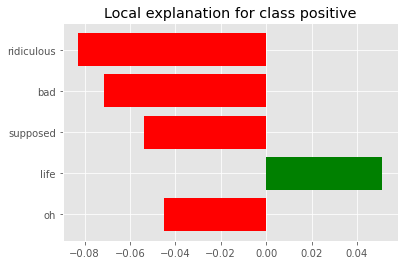

In [98]:
f = exp.as_pyplot_figure()

In [99]:
exp.show_in_notebook(text=True)

In [100]:
x_test.iloc[5]

'remember watching attack came caught recently sci fi channel run worse shameless ripoff jurassic park attack substitutes sabertooth cats dinosaurs loose devouring extras possible cgi pretty bad closeups prosthetic cat heads laughable gore helps little wait mad scientist started mess gets robert carradine little cast unknown apparently shot fiji nice work reminds low budget monster stvs popular 80s 90s'

In [101]:
print("Ground truth: ", y_test.iloc[5])

Ground truth:  0


In [102]:
print(pipeline.predict_proba([x_test.iloc[5]]))

[[0.76 0.24]]


In [103]:
pipeline.predict_proba

<function sklearn.pipeline.Pipeline.predict_proba(self, X)>

In [104]:
exp = explainer.explain_instance(x_test.iloc[5], pipeline.predict_proba, num_features=5)

In [105]:
exp.as_list()

[('bad', -0.10112369801997306),
 ('laughable', -0.05972090412082319),
 ('helps', 0.039787136565348095),
 ('mess', -0.03792752955257409),
 ('apparently', -0.028939597378687516)]

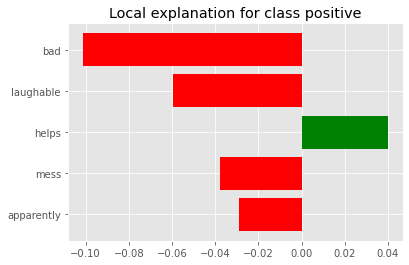

In [106]:
f = exp.as_pyplot_figure()

In [107]:
exp.show_in_notebook(text=True)

In [108]:
x_test.iloc[38]

'ok wile e coyote road runner cartoons know wec going set sorts traps rr maim various ways certainly happens beep beep predictable guess think cartoons try harm harmed sort like daffy duck tries undermine bugs bunny s integrity bugs sees overall classic termite terrace crowd think really wanted ease cold war tensions just let soviet union looney tunes cartoons m sure loved great ps learned jeopardy wile e coyote s middle ethelbert'

In [109]:
print("Ground truth: ", y_test.iloc[38])

Ground truth:  1


In [110]:
print(pipeline.predict_proba([x_test.iloc[38]]))

[[0.36 0.64]]


In [111]:
exp = explainer.explain_instance(x_test.iloc[38], pipeline.predict_proba, num_features=5)

In [112]:
exp.as_list()

[('great', 0.07730366318340165),
 ('guess', -0.07496788083374224),
 ('loved', 0.05407966545251191),
 ('predictable', -0.04872397296605374),
 ('tries', -0.04351910259337353)]

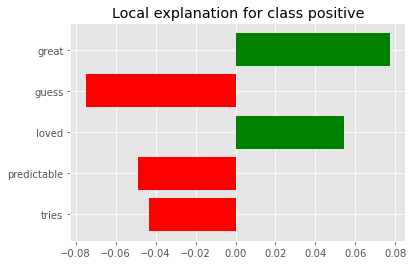

In [113]:
f = exp.as_pyplot_figure()

In [114]:
exp.show_in_notebook(text=True)